In [3]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

%matplotlib inline

# Computational Neuroscience Handson: Izhikevich Neuron Model

In [ ]:
def sim_izhikevich(I,dt,a,b,c,d):
    u = np.zeros_like(I)
    v = np.zeros_like(I)
    
    v[0] = -82
    u[0] = 0

    for t in range(0, len(I)-1):
        dv = 0.04 * v[t]**2 + 5 * v[t] + 140 - u[t] + I[t]
        du = a * (b * v[t+1] - u[t])

        v[t+1] = dt*dv + v[t]
        u[t+1] = dt*du + u[t]

        if v[t+1] > 30:
            v[t+1] = c
            u[t+1] = u[t+1] + d
        
    return u, v

50000 50000
(0.02, 0.2, -65, 0.05)


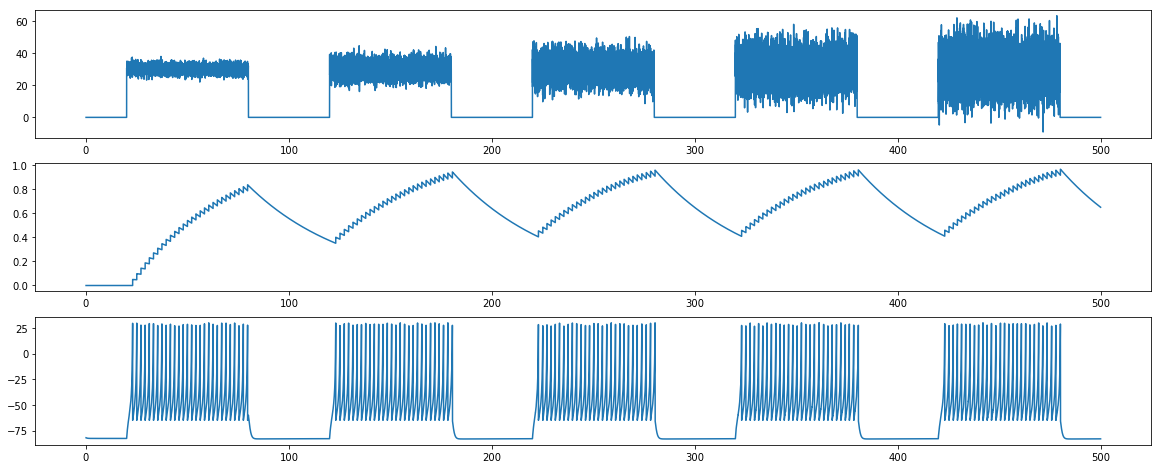

In [4]:
aa = [0.02, 0.1]
bb = [0.2, 0.25]
cc = [-65, -50]
dd = [0.05, 2, 8]

n_steps = 10000
dt = .01

I = 150 * np.ones(n_steps) #+ np.random.normal(0,20,n_steps)
I[:n_steps//5] = 0
I[-n_steps//5:] = 0

I = np.concatenate([I + np.sign(I)*np.random.normal(0,sigma,n_steps) for sigma in [10,20,30,40,50]])

I /= 5

n_steps = len(I)

t = np.linspace(0,dt*n_steps,n_steps)

print(len(t), len(I))

for args in itertools.product(aa,bb,cc,dd):
    print(args)
    break
    
u, v = sim_izhikevich(I, dt, *args)

fig, (axI, axU, axV) = plt.subplots(3,1,figsize=(20,8))

axI.plot(t, I)
axU.plot(t, u)
axV.plot(t, v)

plt.show()